# Image Segmentation with Pre-trained Models

In this tutorial, we show an example using convolutional neural network to perform image segmentation using a pre-trained model. The intended audience is anyone who is interested in learning about deep learning. This tutorial assumes familiarity with deep learning concepts. The tutorial is written in Python and uses MXNET framework. You can view more tutorials here: http://mxnet.io/tutorials/index.html

## How to Use This Tutorial

You can copy and paste each code snippet from this tutorial into a Python environment, or you can choose to just read through the code.

You will accomplish the following:

- Create a model using a pre-trained model.  
- Using MXNET, classify a image with labels and confidence values.

## Prerequisites

To complete this tutorial, you need:

- [MXNet](//http://mxnet.io/get_started/setup.html#overview)
- Familiarity with convolutional neural network and deep learning concepts.

# Prepare the Data

The required model files are hosted at https://bitbucket.org/rpanchumarthy/modelzoo/src/7ba1ab4fd4db/mxnet-fcn-xs/ 

We first define a download function and download pre-trained model, symbol file and a test image.

Note: The pre-trained model is about 500MB, so first time downloading might take some time.

Other models are available at http://data.mxnet.io/models/

In [1]:
#Import neccessary modules.
import numpy as np
import mxnet as mx
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os, urllib2, time

In [2]:
#Download function to download required files.
def download(url,filename):
    if not os.path.exists(filename):
        # urllib.urlretrieve(url, filename)
        resp = urllib2.urlopen(url)
        with open(filename, 'wb') as f:
            f.write(resp.read())
        
# Download model file
params_path = 'https://bitbucket.org/rpanchumarthy/modelzoo/raw/a6f83755feb3f8d3ad673a2b2cb4a7b330a25a56/mxnet-fcn-xs/FCN8s_VGG16-0019.params'
download(params_path, 'FCN8s_VGG16-0019.params')

# Download symbol file
json_path = 'https://bitbucket.org/rpanchumarthy/modelzoo/raw/a6f83755feb3f8d3ad673a2b2cb4a7b330a25a56/mxnet-fcn-xs/FCN8s_VGG16-symbol.json'
download(json_path, 'FCN8s_VGG16-symbol.json')

# Download image
img_path = 'https://bytebucket.org/rpanchumarthy/modelzoo/raw/7ba1ab4fd4db08a9588d74bb2b215029bd1a5ab5/mxnet-fcn-xs/Bikemore_V2-30.JPG'
download(img_path, 'person_bicycle.jpg')

# Model Preparation
Define argument settings for model. Initialize to use CPU mode.


In [3]:
img = "./person_bicycle.jpg" # Name of input image
seg = img.replace("jpg", "png") # Name of output image is the same with input but in png ext 
model_previx = "FCN8s_VGG16" # Name of model
epoch = 19 # Number of Epoch
ctx = mx.cpu(0) # Use CPU

# Preprocess the data for evaluation
Define a function to convert input image to np.array

In [4]:
def get_data(img_path):
    # Function to convert input image to np.array
    """get the (1, 3, h, w) np.array data for the img_path"""
    mean = np.array([123.68, 116.779, 103.939])  # (R,G,B)
    img = Image.open(img_path)
    img = np.array(img, dtype=np.float32)
    reshaped_mean = mean.reshape(1, 1, 3)
    img = img - reshaped_mean
    img = np.swapaxes(img, 0, 2)
    img = np.swapaxes(img, 1, 2)
    img = np.expand_dims(img, axis=0)
    return img

Define a function to get the colormap for visualizing the segmentation mask     

In [5]:
def getpallete(num_cls):      
        n = num_cls
        pallete = [0]*(n*3)
        for j in xrange(0,n):
                lab = j
                pallete[j*3+0] = 0
                pallete[j*3+1] = 0
                pallete[j*3+2] = 0
                i = 0
                while (lab > 0):
                        pallete[j*3+0] |= (((lab >> 0) & 1) << (7-i))
                        pallete[j*3+1] |= (((lab >> 1) & 1) << (7-i))
                        pallete[j*3+2] |= (((lab >> 2) & 1) << (7-i))
                        i = i + 1
                        lab >>= 3
        return pallete
    
pallete = getpallete(256)

# Evaluate the model.
We load the model and the input image. Get the required metadata of the input image and perform forward propagation and obtain results.

Time taken for forward pass: 0.096 milli sec
Postprocessing results to display output...
Input Image:


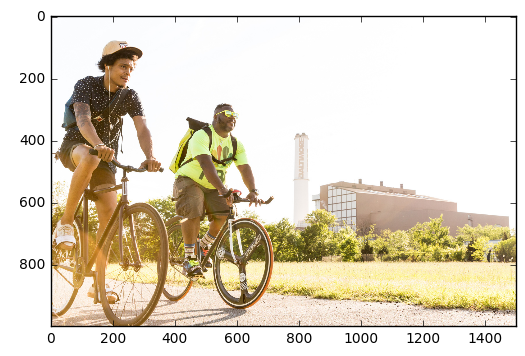

Output Image:


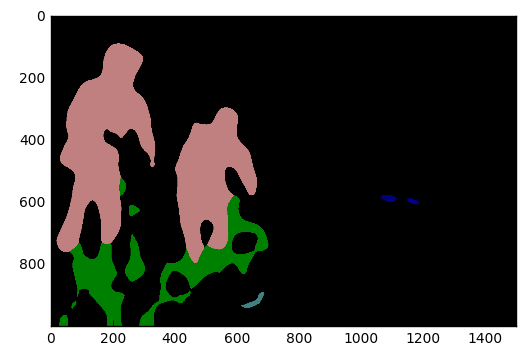

In [9]:
if __name__ == "__main__":
    # Load model
    fcnxs, fcnxs_args, fcnxs_auxs = mx.model.load_checkpoint(model_previx, epoch) 
    
    # Input images are stored in a 4-D matrix 
    fcnxs_args["data"] = mx.nd.array(get_data(img), ctx) 
    data_shape = fcnxs_args["data"].shape
    label_shape = (1, data_shape[2]*data_shape[3])
    fcnxs_args["softmax_label"] = mx.nd.empty(label_shape, ctx)
    exector = fcnxs.bind(ctx, fcnxs_args ,args_grad=None, grad_req="null", aux_states=fcnxs_args)

    tic = time.time()
    exector.forward(is_train=False)
    print "Time taken for forward pass: {:.3f} milli sec".format((time.time()-tic)*1000)
    
    print "Postprocessing results to display output..."
    output = exector.outputs[0]
    out_img = np.uint8(np.squeeze(output.asnumpy().argmax(axis=1)))
    out_img = Image.fromarray(out_img)
    out_img.putpalette(pallete)
    out_img.save(seg)
    
    # Display input
    print "Input Image:"
    img_in = mpimg.imread(img)
    imgplot = plt.imshow(img_in)
    plt.show()
    
    # Display output
    print "Output Image:"
    img_out = mpimg.imread(seg)
    imgplot = plt.imshow(img_out)
    plt.show()
    

# Summary

We showed how to perform image segmentation with pretrained model.

## Next Steps

- For more information on *MXNet*, see [MXNet](http://mxnet.io/get_started/index.html).
- For more *tutorials*, see [Tutorials](http://mxnet.io/tutorials/index.html).
- To train a image segmentation model, see [FCN-XS](https://github.com/dmlc/mxnet/tree/master/example/fcn-xs)